In [ ]:
#%%

import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#%%

df = pd.read_csv(r'C:\Users\Marcos Hiarley\Documents\GitHub\Ns-3-simulations\5g_lena-Scripts\datasets\csv\UlPathlossTrace.csv' )
print(df.columns)  # Print the columns to verify the names

df # Count the number of occurrences of each value in the 'IMSI' column

Index(['Time(sec)', 'CellId', 'BwpId', 'IMSI', 'pathLoss(dB)'], dtype='object')


,Time(sec),CellId,BwpId,IMSI,pathLoss(dB)
0,0.017929,3,0,1,-103.7210
1,0.017929,3,0,2,-88.3023
2,0.017929,1,0,3,-93.6438
3,0.017929,3,0,4,-85.8779
4,0.017929,3,0,5,-91.0422
...,...,...,...,...,...
7800,1.998930,3,0,5,-91.0422
7801,1.999930,3,0,1,-103.7210
7802,1.999930,3,0,2,-88.3023
7803,1.999930,3,0,4,-85.8779


In [ ]:
# %%

# Função para filtrar DataFrame por rnti
def filter_by_rnti(df, imsi_values):
    return {imsi: df[df['IMSI'] == imsi] for imsi in imsi_values}

imsi_values = range(1,4)  # p/ 2 usuarios
filtered_dfs = filter_by_rnti(df, imsi_values)

<ipython-input-4-62d7f40a8833>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(imsi_values))  # Get a colormap with enough colors


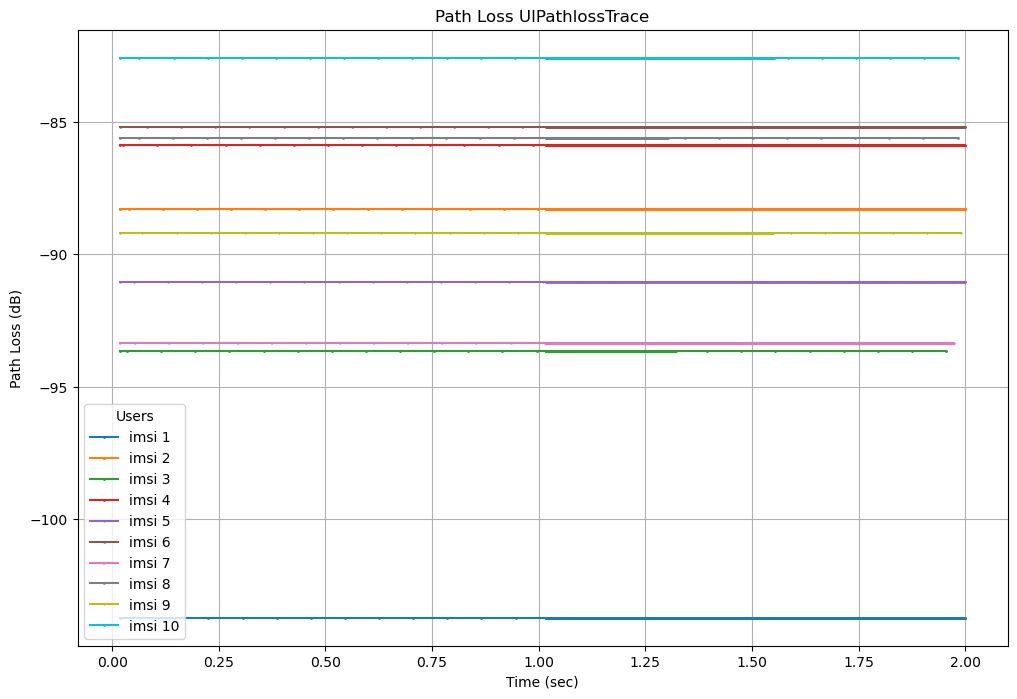

In [ ]:
#%%

# Identify unique IMSI values
imsi_values = df['IMSI'].unique()
filtered_dfs = filter_by_rnti(df, imsi_values)

plt.figure(figsize=(12, 8))

colors = plt.cm.get_cmap('tab10', len(imsi_values))  # Get a colormap with enough colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # Define markers for each user

for i, imsi in enumerate(imsi_values):
    user_df = filtered_dfs[imsi]
    plt.plot(user_df['Time(sec)'], user_df['pathLoss(dB)'], label=f'imsi {imsi}', color=colors(i), marker=markers[i % len(markers)], linestyle='-', markersize=1)

plt.title('Path Loss UlPathlossTrace')
plt.xlabel('Time (sec)')
plt.ylabel('Path Loss (dB)')
plt.legend(title='Users')
plt.grid(True)
plt.show()

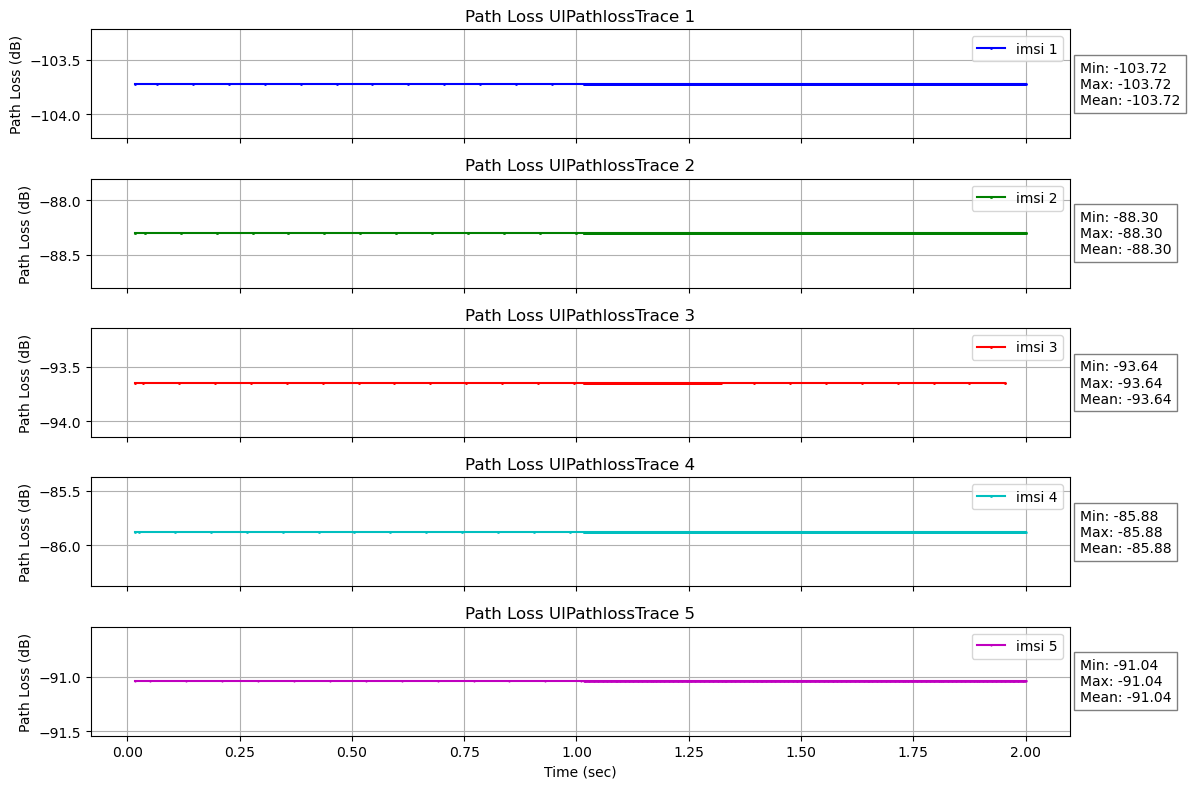

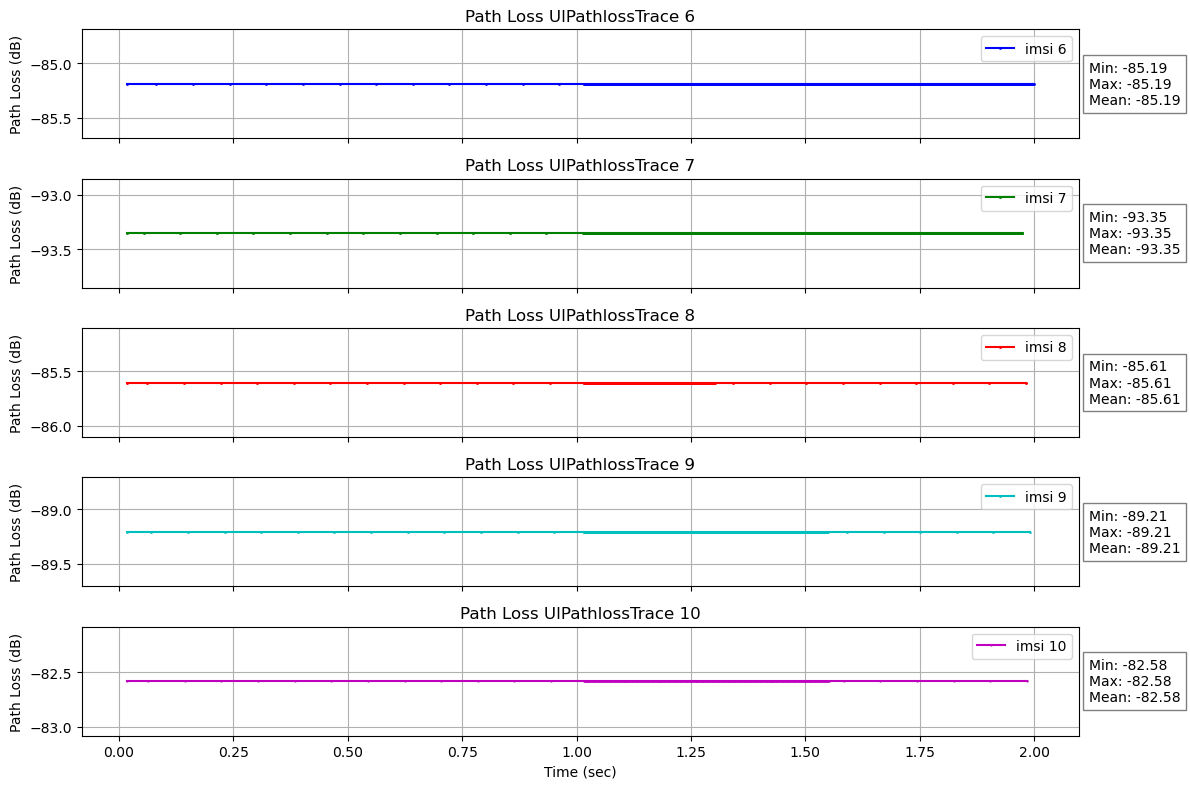

In [ ]:
#%%

num_users = len(imsi_values)
users_per_plot = 5

# Sort IMSI values in ascending order
sorted_imsi_values = sorted(imsi_values)

# Define a fixed set of 5 colors
fixed_colors = ['b', 'g', 'r', 'c', 'm']

for start in range(0, num_users, users_per_plot):
    end = min(start + users_per_plot, num_users)
    fig, axs = plt.subplots(end - start, 1, figsize=(12, 8), sharex=True)

    for i, imsi in enumerate(sorted_imsi_values[start:end]):
        user_df = filtered_dfs[imsi]
        color = fixed_colors[i % len(fixed_colors)]
        axs[i].plot(user_df['Time(sec)'], user_df['pathLoss(dB)'], label=f'imsi {imsi}', color=color, marker=markers[i % len(markers)], linestyle='-', markersize=1)
        axs[i].set_title(f'Path Loss UlPathlossTrace {imsi}')
        axs[i].set_ylabel('Path Loss (dB)')
        axs[i].legend()
        axs[i].grid(True)
        # Adjust y-axis to show smaller variations
        axs[i].set_ylim(user_df['pathLoss(dB)'].min() - 0.5, user_df['pathLoss(dB)'].max() + 0.5)

        # Add text box with min, max, and mean values
        stats_text = f"Min: {user_df['pathLoss(dB)'].min():.2f}\nMax: {user_df['pathLoss(dB)'].max():.2f}\nMean: {user_df['pathLoss(dB)'].mean():.2f}"
        axs[i].text(1.01, 0.5, stats_text, transform=axs[i].transAxes, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    axs[-1].set_xlabel('Time (sec)')

    plt.tight_layout()
    plt.show()

In [ ]:
# %%

df_grouped = df.groupby('IMSI')['pathLoss(dB)'].describe()

df_grouped

,count,mean,std,min,25%,50%,75%,max
IMSI,,,,,,,,
1,1011.0,-103.7210,1.336481e-12,-103.7210,-103.7210,-103.7210,-103.7210,-103.7210
2,1011.0,-88.3023,1.848325e-13,-88.3023,-88.3023,-88.3023,-88.3023,-88.3023
3,332.0,-93.6438,7.116153e-13,-93.6438,-93.6438,-93.6438,-93.6438,-93.6438
4,1011.0,-85.8779,1.350699e-12,-85.8779,-85.8779,-85.8779,-85.8779,-85.8779
5,1011.0,-91.0422,1.137431e-13,-91.0422,-91.0422,-91.0422,-91.0422,-91.0422
6,1009.0,-85.1882,7.108951e-14,-85.1882,-85.1882,-85.1882,-85.1882,-85.1882
7,984.0,-93.3513,9.810476e-13,-93.3513,-93.3513,-93.3513,-93.3513,-93.3513
8,313.0,-85.6052,6.832133e-13,-85.6052,-85.6052,-85.6052,-85.6052,-85.6052
9,560.0,-89.2058,1.024096e-12,-89.2058,-89.2058,-89.2058,-89.2058,-89.2058


In [ ]:
# %%

# Create a new DataFrame to store the first and last pathLoss values for each IMSI
first_last_pathloss = pd.DataFrame(columns=['IMSI', 'First Time (sec)', 'First Path Loss (dB)', 'Last Time (sec)', 'Last Path Loss (dB)', 'Change (%)'])

rows = []

for imsi in imsi_values:
    user_df = filtered_dfs[imsi]
    first_time = user_df['Time(sec)'].iloc[0]
    first_path_loss = user_df['pathLoss(dB)'].iloc[0]
    last_time = user_df['Time(sec)'].iloc[-1]
    last_path_loss = user_df['pathLoss(dB)'].iloc[-1]
    
    change_percent = ((last_path_loss - first_path_loss) / first_path_loss) * 100
    
    rows.append({
        'IMSI': imsi,
        'First Time (sec)': first_time,
        'First Path Loss (dB)': first_path_loss,
        'Last Time (sec)': last_time,
        'Last Path Loss (dB)': last_path_loss,
        'Change (%)': change_percent
    })

first_last_pathloss = pd.concat([first_last_pathloss, pd.DataFrame(rows)], ignore_index=True)

print(first_last_pathloss)

  IMSI  First Time (sec)  First Path Loss (dB)  Last Time (sec)  \
0    1          0.017929             -103.7210          1.99993   
1    2          0.017929              -88.3023          1.99993   
2    3          0.017929              -93.6438          1.95486   
3    4          0.017929              -85.8779          1.99993   
4    5          0.017929              -91.0422          1.99993   
5    6          0.017929              -85.1882          1.99893   
6    7          0.017929              -93.3513          1.97386   
7    8          0.017929              -85.6052          1.98186   
8    9          0.017929              -89.2058          1.99086   
9   10          0.017929              -82.5820          1.98386   

   Last Path Loss (dB)  Change (%)  
0            -103.7210        -0.0  
1             -88.3023        -0.0  
2             -93.6438        -0.0  
3             -85.8779        -0.0  
4             -91.0422        -0.0  
5             -85.1882        -0.0  
6  

<ipython-input-7-b51fe77ba8e5>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  first_last_pathloss = pd.concat([first_last_pathloss, pd.DataFrame(rows)], ignore_index=True)


In [ ]:
# %%

first_last_pathloss

,IMSI,First Time (sec),First Path Loss (dB),Last Time (sec),Last Path Loss (dB),Change (%)
0,1,0.017929,-103.7210,1.99993,-103.7210,-0.0
1,2,0.017929,-88.3023,1.99993,-88.3023,-0.0
2,3,0.017929,-93.6438,1.95486,-93.6438,-0.0
3,4,0.017929,-85.8779,1.99993,-85.8779,-0.0
4,5,0.017929,-91.0422,1.99993,-91.0422,-0.0
5,6,0.017929,-85.1882,1.99893,-85.1882,-0.0
6,7,0.017929,-93.3513,1.97386,-93.3513,-0.0
7,8,0.017929,-85.6052,1.98186,-85.6052,-0.0
8,9,0.017929,-89.2058,1.99086,-89.2058,-0.0
9,10,0.017929,-82.5820,1.98386,-82.5820,-0.0


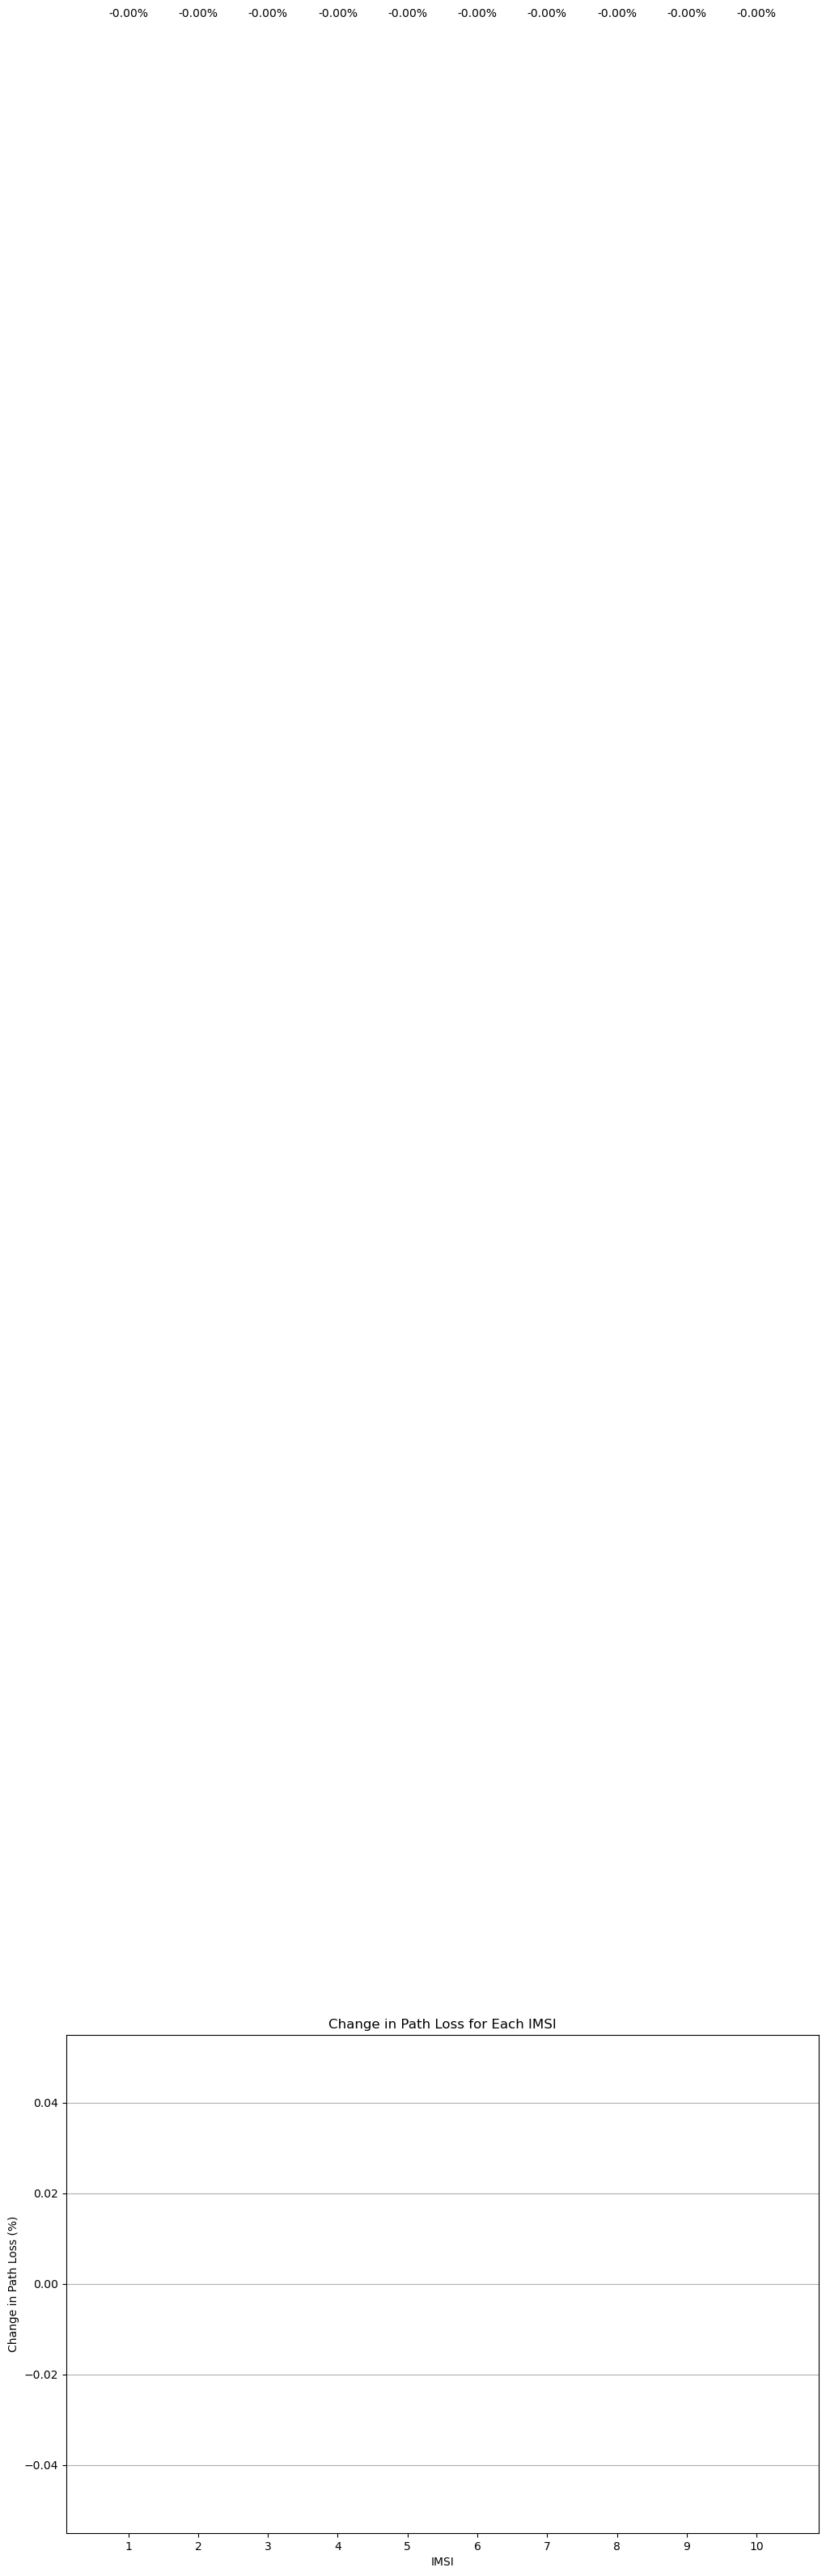

In [ ]:
# %%

plt.figure(figsize=(12, 8))

# Plot the change percentage for each IMSI
plt.bar(first_last_pathloss['IMSI'].astype(str), first_last_pathloss['Change (%)'], color='skyblue')

plt.title('Change in Path Loss for Each IMSI')
plt.xlabel('IMSI')
plt.ylabel('Change in Path Loss (%)')
plt.grid(True, axis='y')

# Add text labels for each bar
for i, row in first_last_pathloss.iterrows():
    plt.text(i, row['Change (%)'] + 0.5, f"{row['Change (%)']:.2f}%", ha='center', va='bottom')

plt.show()

In [ ]:
# %%

df

,Time(sec),CellId,BwpId,IMSI,pathLoss(dB)
0,0.017929,3,0,1,-103.7210
1,0.017929,3,0,2,-88.3023
2,0.017929,1,0,3,-93.6438
3,0.017929,3,0,4,-85.8779
4,0.017929,3,0,5,-91.0422
...,...,...,...,...,...
7800,1.998930,3,0,5,-91.0422
7801,1.999930,3,0,1,-103.7210
7802,1.999930,3,0,2,-88.3023
7803,1.999930,3,0,4,-85.8779


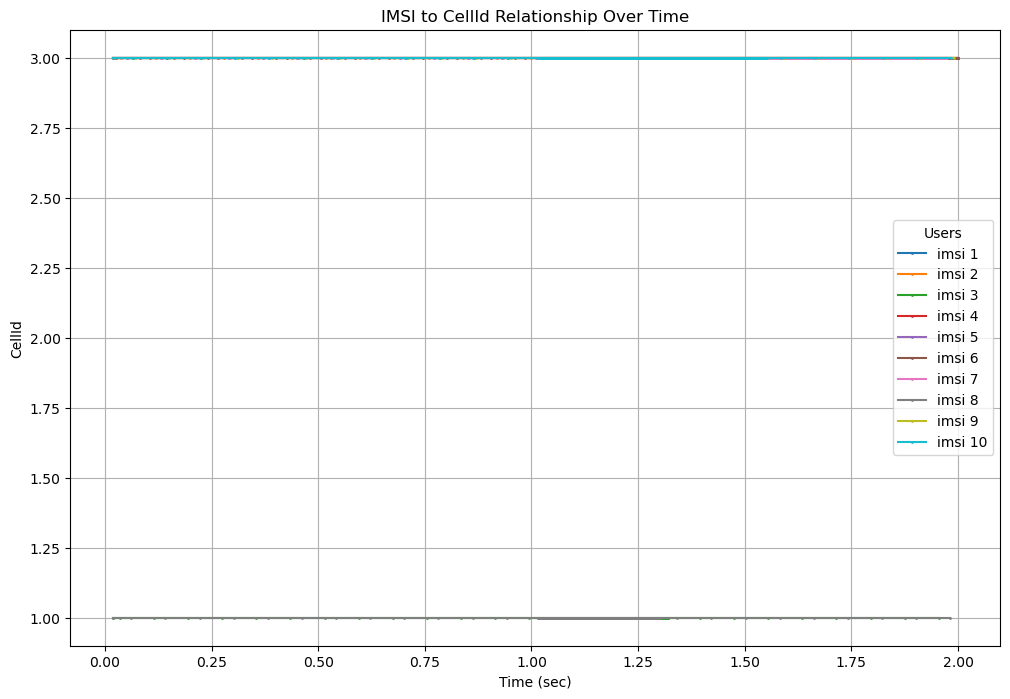

In [ ]:
# %%

# Plot the relationship between IMSI and CellId over time
plt.figure(figsize=(12, 8))

for imsi in imsi_values:
    user_df = filtered_dfs[imsi]
    plt.plot(user_df['Time(sec)'], user_df['CellId'], label=f'imsi {imsi}', marker='o', linestyle='-', markersize=1)

    # Highlight the points where CellId changes
    cellid_changes = user_df['CellId'].diff().fillna(0) != 0
    plt.scatter(user_df['Time(sec)'][cellid_changes], user_df['CellId'][cellid_changes], color='red', zorder=5)

plt.title('IMSI to CellId Relationship Over Time')
plt.xlabel('Time (sec)')
plt.ylabel('CellId')
plt.legend(title='Users')
plt.grid(True)
plt.show()

In [ ]:
# %%

# Create a DataFrame to store the count of IMSIs connected to each CellId over time
df['CellId'].value_counts()

CellId
3    7160
1     645
Name: count, dtype: int64

In [ ]:
# %%

# Group by CellId and IMSI, and count the occurrences
cellid_imsi_grouped = df.groupby(['CellId', 'IMSI']).size().reset_index(name='Count')

print(cellid_imsi_grouped)

   CellId  IMSI  Count
0       1     3    332
1       1     8    313
2       3     1   1011
3       3     2   1011
4       3     4   1011
5       3     5   1011
6       3     6   1009
7       3     7    984
8       3     9    560
9       3    10    563


<ipython-input-14-ebfefe1effb4>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_imsi_values_3))  # Get a colormap with enough colors


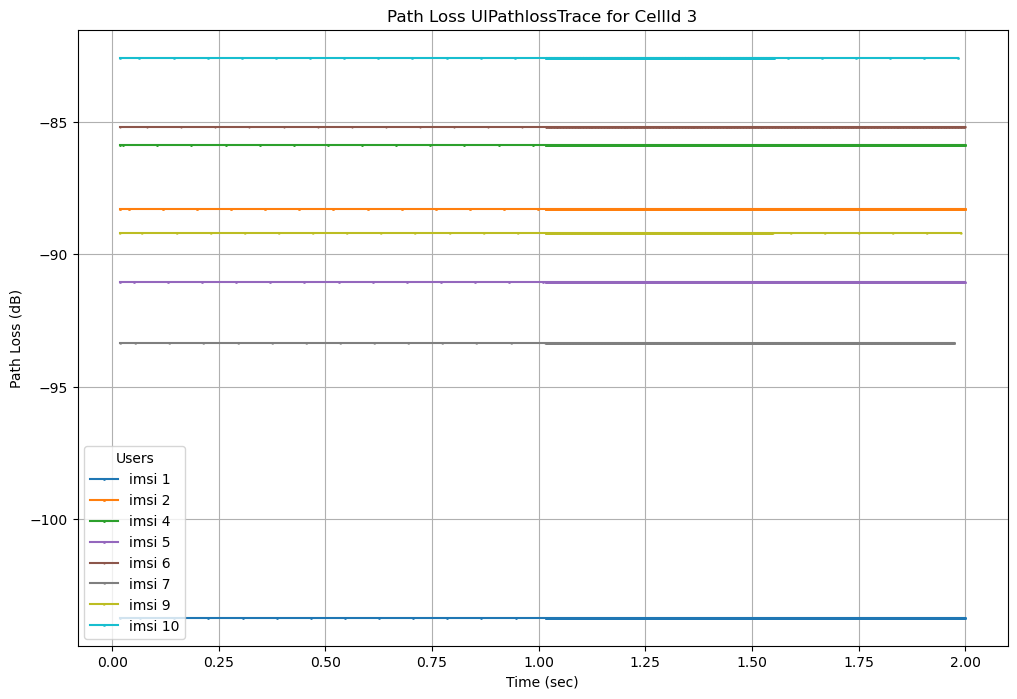

<ipython-input-14-ebfefe1effb4>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_imsi_values_7))  # Get a colormap with enough colors
<ipython-input-14-ebfefe1effb4>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Users')


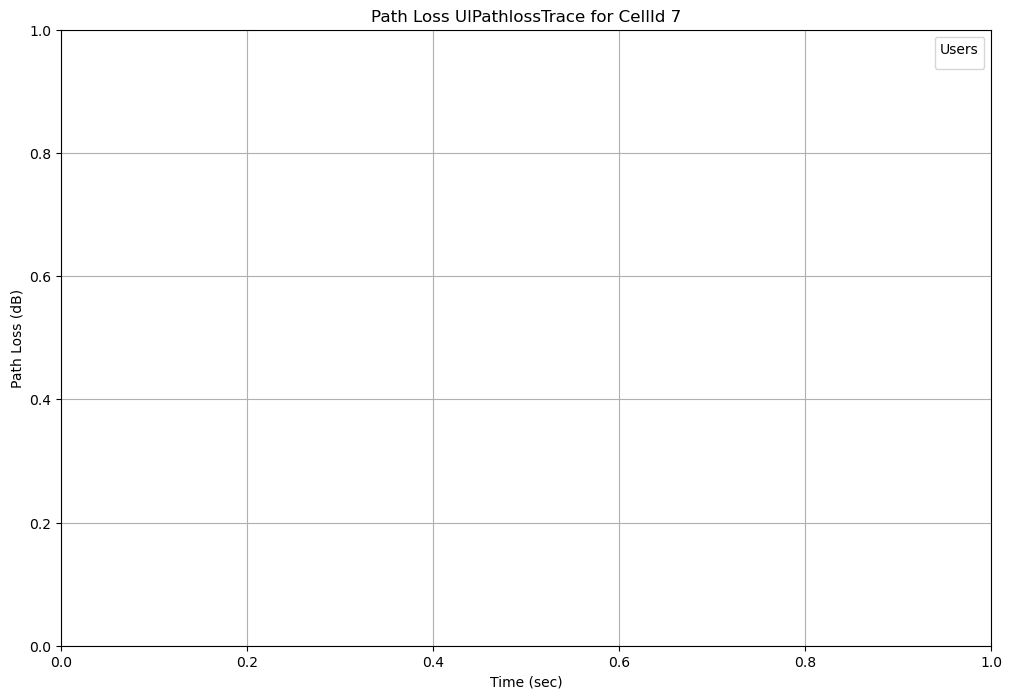

In [ ]:
# %%

#### testes isolados para CellId 3 e 7

# Filter the DataFrame for CellId 3
filtered_df_3 = df[df['CellId'] == 3]

# Identify unique IMSI values for the filtered DataFrame
filtered_imsi_values_3 = filtered_df_3['IMSI'].unique()
filtered_dfs_3 = filter_by_rnti(filtered_df_3, filtered_imsi_values_3)

plt.figure(figsize=(12, 8))

colors = plt.cm.get_cmap('tab10', len(filtered_imsi_values_3))  # Get a colormap with enough colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # Define markers for each user

for i, imsi in enumerate(filtered_imsi_values_3):
    user_df = filtered_dfs_3[imsi]
    plt.plot(user_df['Time(sec)'], user_df['pathLoss(dB)'], label=f'imsi {imsi}', color=colors(i), marker=markers[i % len(markers)], linestyle='-', markersize=1)

plt.title('Path Loss UlPathlossTrace for CellId 3')
plt.xlabel('Time (sec)')
plt.ylabel('Path Loss (dB)')
plt.legend(title='Users')
plt.grid(True)
plt.show()

# Filter the DataFrame for CellId 7
filtered_df_7 = df[df['CellId'] == 7]

# Identify unique IMSI values for the filtered DataFrame
filtered_imsi_values_7 = filtered_df_7['IMSI'].unique()
filtered_dfs_7 = filter_by_rnti(filtered_df_7, filtered_imsi_values_7)

plt.figure(figsize=(12, 8))

colors = plt.cm.get_cmap('tab10', len(filtered_imsi_values_7))  # Get a colormap with enough colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # Define markers for each user

for i, imsi in enumerate(filtered_imsi_values_7):
    user_df = filtered_dfs_7[imsi]
    plt.plot(user_df['Time(sec)'], user_df['pathLoss(dB)'], label=f'imsi {imsi}', color=colors(i), marker=markers[i % len(markers)], linestyle='-', markersize=1)

plt.title('Path Loss UlPathlossTrace for CellId 7')
plt.xlabel('Time (sec)')
plt.ylabel('Path Loss (dB)')
plt.legend(title='Users')
plt.grid(True)
plt.show()

<ipython-input-15-960ca63dd0de>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  first_last_pathloss_all = pd.concat([first_last_pathloss_all, pd.DataFrame(all_rows)], ignore_index=True)


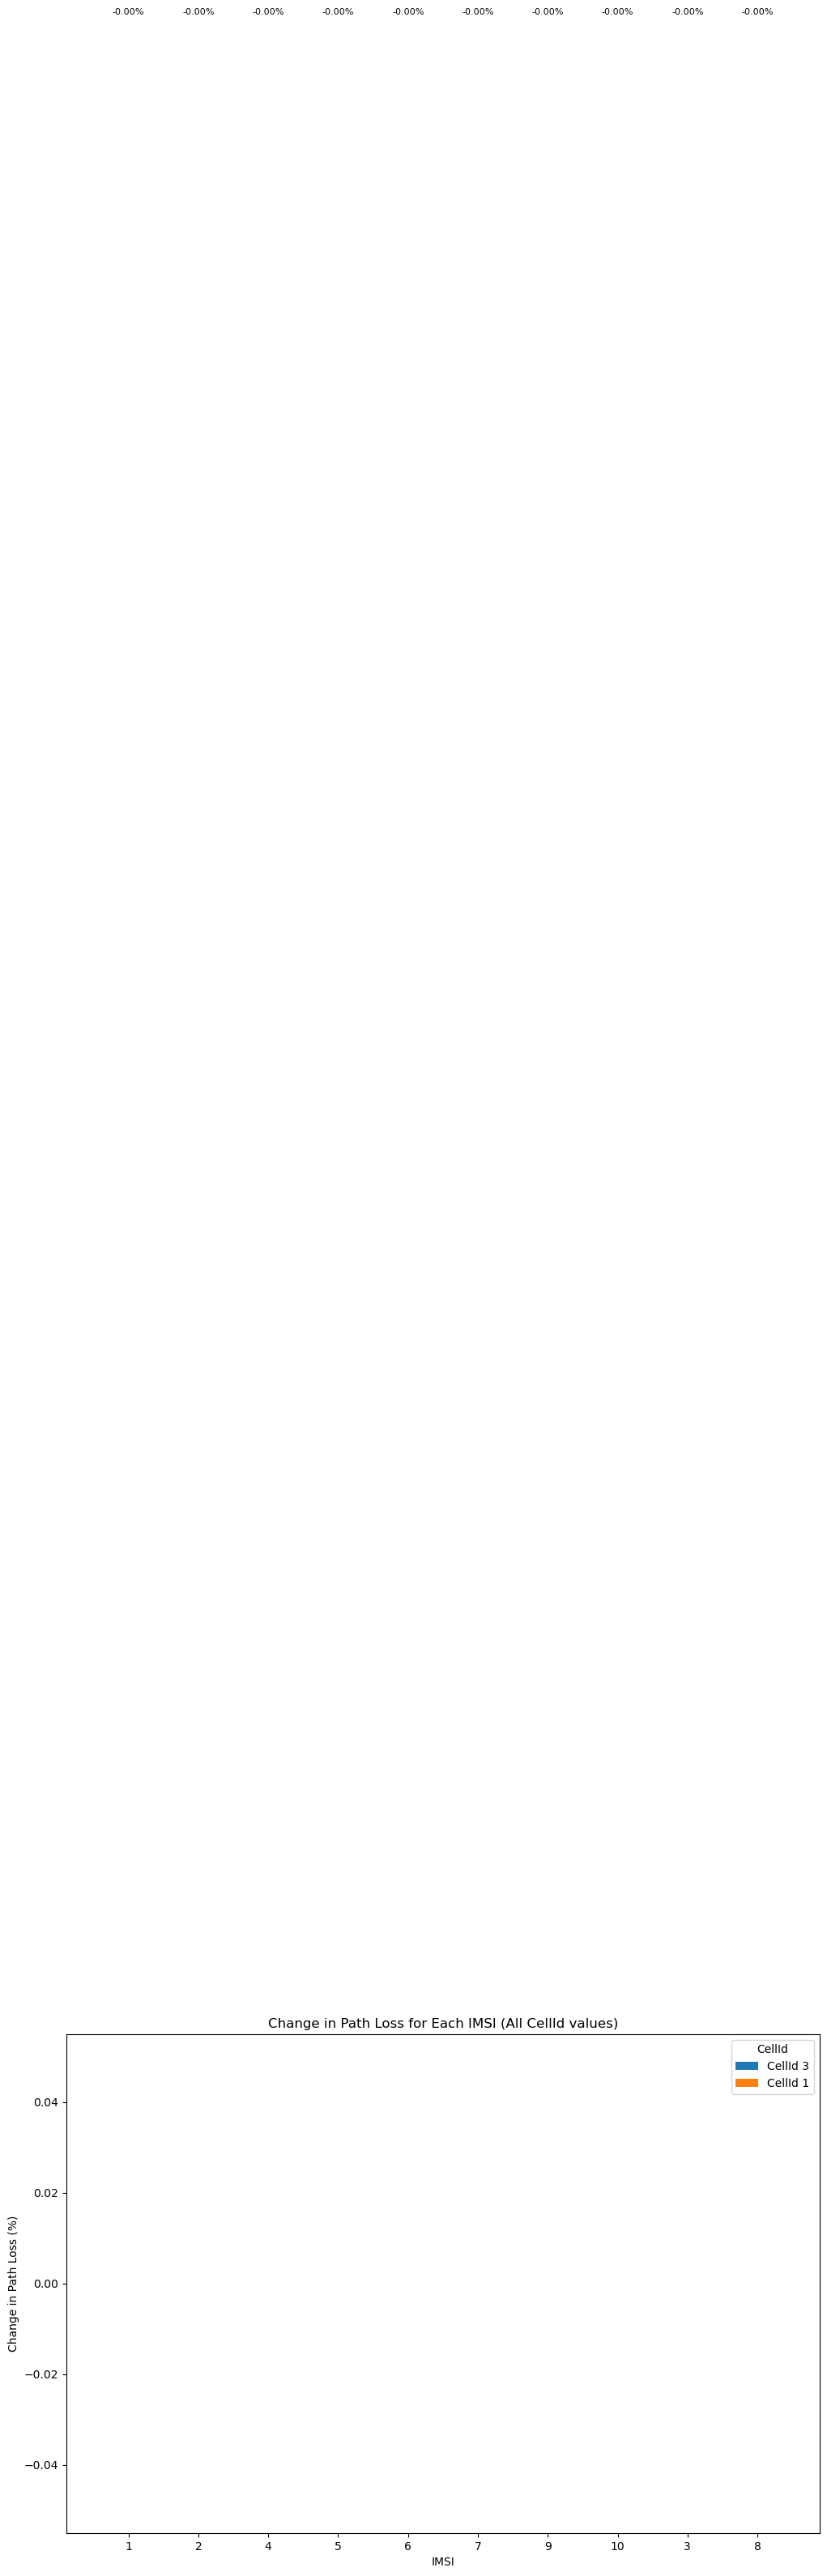

In [ ]:
# %%

# Create a new DataFrame to store the first and last pathLoss values for each IMSI for CellId 3 and 7
first_last_pathloss_all = pd.DataFrame(columns=['CellId', 'IMSI', 'First Time (sec)', 'First Path Loss (dB)', 'Last Time (sec)', 'Last Path Loss (dB)', 'Change (%)'])

# Function to calculate first and last path loss and percentage change
def calculate_first_last_pathloss(cell_id, filtered_dfs):
    rows = []
    for imsi in filtered_dfs.keys():
        user_df = filtered_dfs[imsi]
        first_time = user_df['Time(sec)'].iloc[0]
        first_path_loss = user_df['pathLoss(dB)'].iloc[0]
        last_time = user_df['Time(sec)'].iloc[-1]
        last_path_loss = user_df['pathLoss(dB)'].iloc[-1]
        
        change_percent = ((last_path_loss - first_path_loss) / first_path_loss) * 100
        
        rows.append({
            'CellId': cell_id,
            'IMSI': imsi,
            'First Time (sec)': first_time,
            'First Path Loss (dB)': first_path_loss,
            'Last Time (sec)': last_time,
            'Last Path Loss (dB)': last_path_loss,
            'Change (%)': change_percent
        })
    return rows

# Get unique CellId values
cellid_values = df['CellId'].unique()

# Calculate for all CellId values
all_rows = []
for cell_id in cellid_values:
    filtered_df = df[df['CellId'] == cell_id]
    filtered_imsi_values = filtered_df['IMSI'].unique()
    filtered_dfs = filter_by_rnti(filtered_df, filtered_imsi_values)
    all_rows.extend(calculate_first_last_pathloss(cell_id, filtered_dfs))

# Combine the results
first_last_pathloss_all = pd.concat([first_last_pathloss_all, pd.DataFrame(all_rows)], ignore_index=True)

# Plot the change percentage for each IMSI for all CellId values
plt.figure(figsize=(12, 8))

for cell_id in cellid_values:
    cell_df = first_last_pathloss_all[first_last_pathloss_all['CellId'] == cell_id]
    plt.bar(cell_df['IMSI'].astype(str), cell_df['Change (%)'], label=f'CellId {cell_id}')

plt.title('Change in Path Loss for Each IMSI (All CellId values)')
plt.xlabel('IMSI')
plt.ylabel('Change in Path Loss (%)')
plt.legend(title='CellId')

# Add text labels for each bar
for i, row in first_last_pathloss_all.iterrows():
    plt.text(i, row['Change (%)'] + 0.5, f"{row['Change (%)']:.2f}%", ha='center', va='bottom', fontsize=8)

plt.show()